In [55]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [26]:
data = pd.read_csv('datasetmalware.csv')

In [27]:
data.head()

Name  e_magic  e_cblp  e_cp  e_crlc  \
0  VirusShare_a878ba26000edaac5c98eff4432723b3    23117     144     3       0   
1  VirusShare_ef9130570fddc174b312b2047f5f4cf0    23117     144     3       0   
2  VirusShare_ef84cdeba22be72a69b198213dada81a    23117     144     3       0   
3  VirusShare_6bf3608e60ebc16cbcff6ed5467d469e    23117     144     3       0   
4  VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb    23117     144     3       0   

   e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  ...  SectionMaxChar  \
0          4           0       65535     0   184  ...      3758096608   
1          4           0       65535     0   184  ...      3791650880   
2          4           0       65535     0   184  ...      3221225536   
3          4           0       65535     0   184  ...      3224371328   
4          4           0       65535     0   184  ...      3227516992   

   SectionMainChar  DirectoryEntryImport  DirectoryEntryImportSize  \
0                0                     7                       152   
1                0                    16                       311   
2                0                     6                       176   
3                0                     8                       155   
4                0                     2                        43   

   DirectoryEntryExport  ImageDirectoryEntryExport  ImageDirectoryEntryImport  \
0                     0                          0                      54440   
1                     0                          0                     262276   
2                     0                          0                      36864   
3                     0                          0                     356352   
4                     0                          0                      61440   

   ImageDirectoryEntryResource  ImageDirectoryEntryException  \
0                        77824                         73728   
1                       294912                             0   
2                        40960                             0   
3                      1003520                             0   
4                        73728                             0   

   ImageDirectoryEntrySecurity  
0                            0  
1                       346112  
2                            0  
3                     14109472  
4                        90624  

[5 rows x 79 columns]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [63]:
data.drop_duplicates()
data.isnull().sum()
data.dropna(inplace=True)

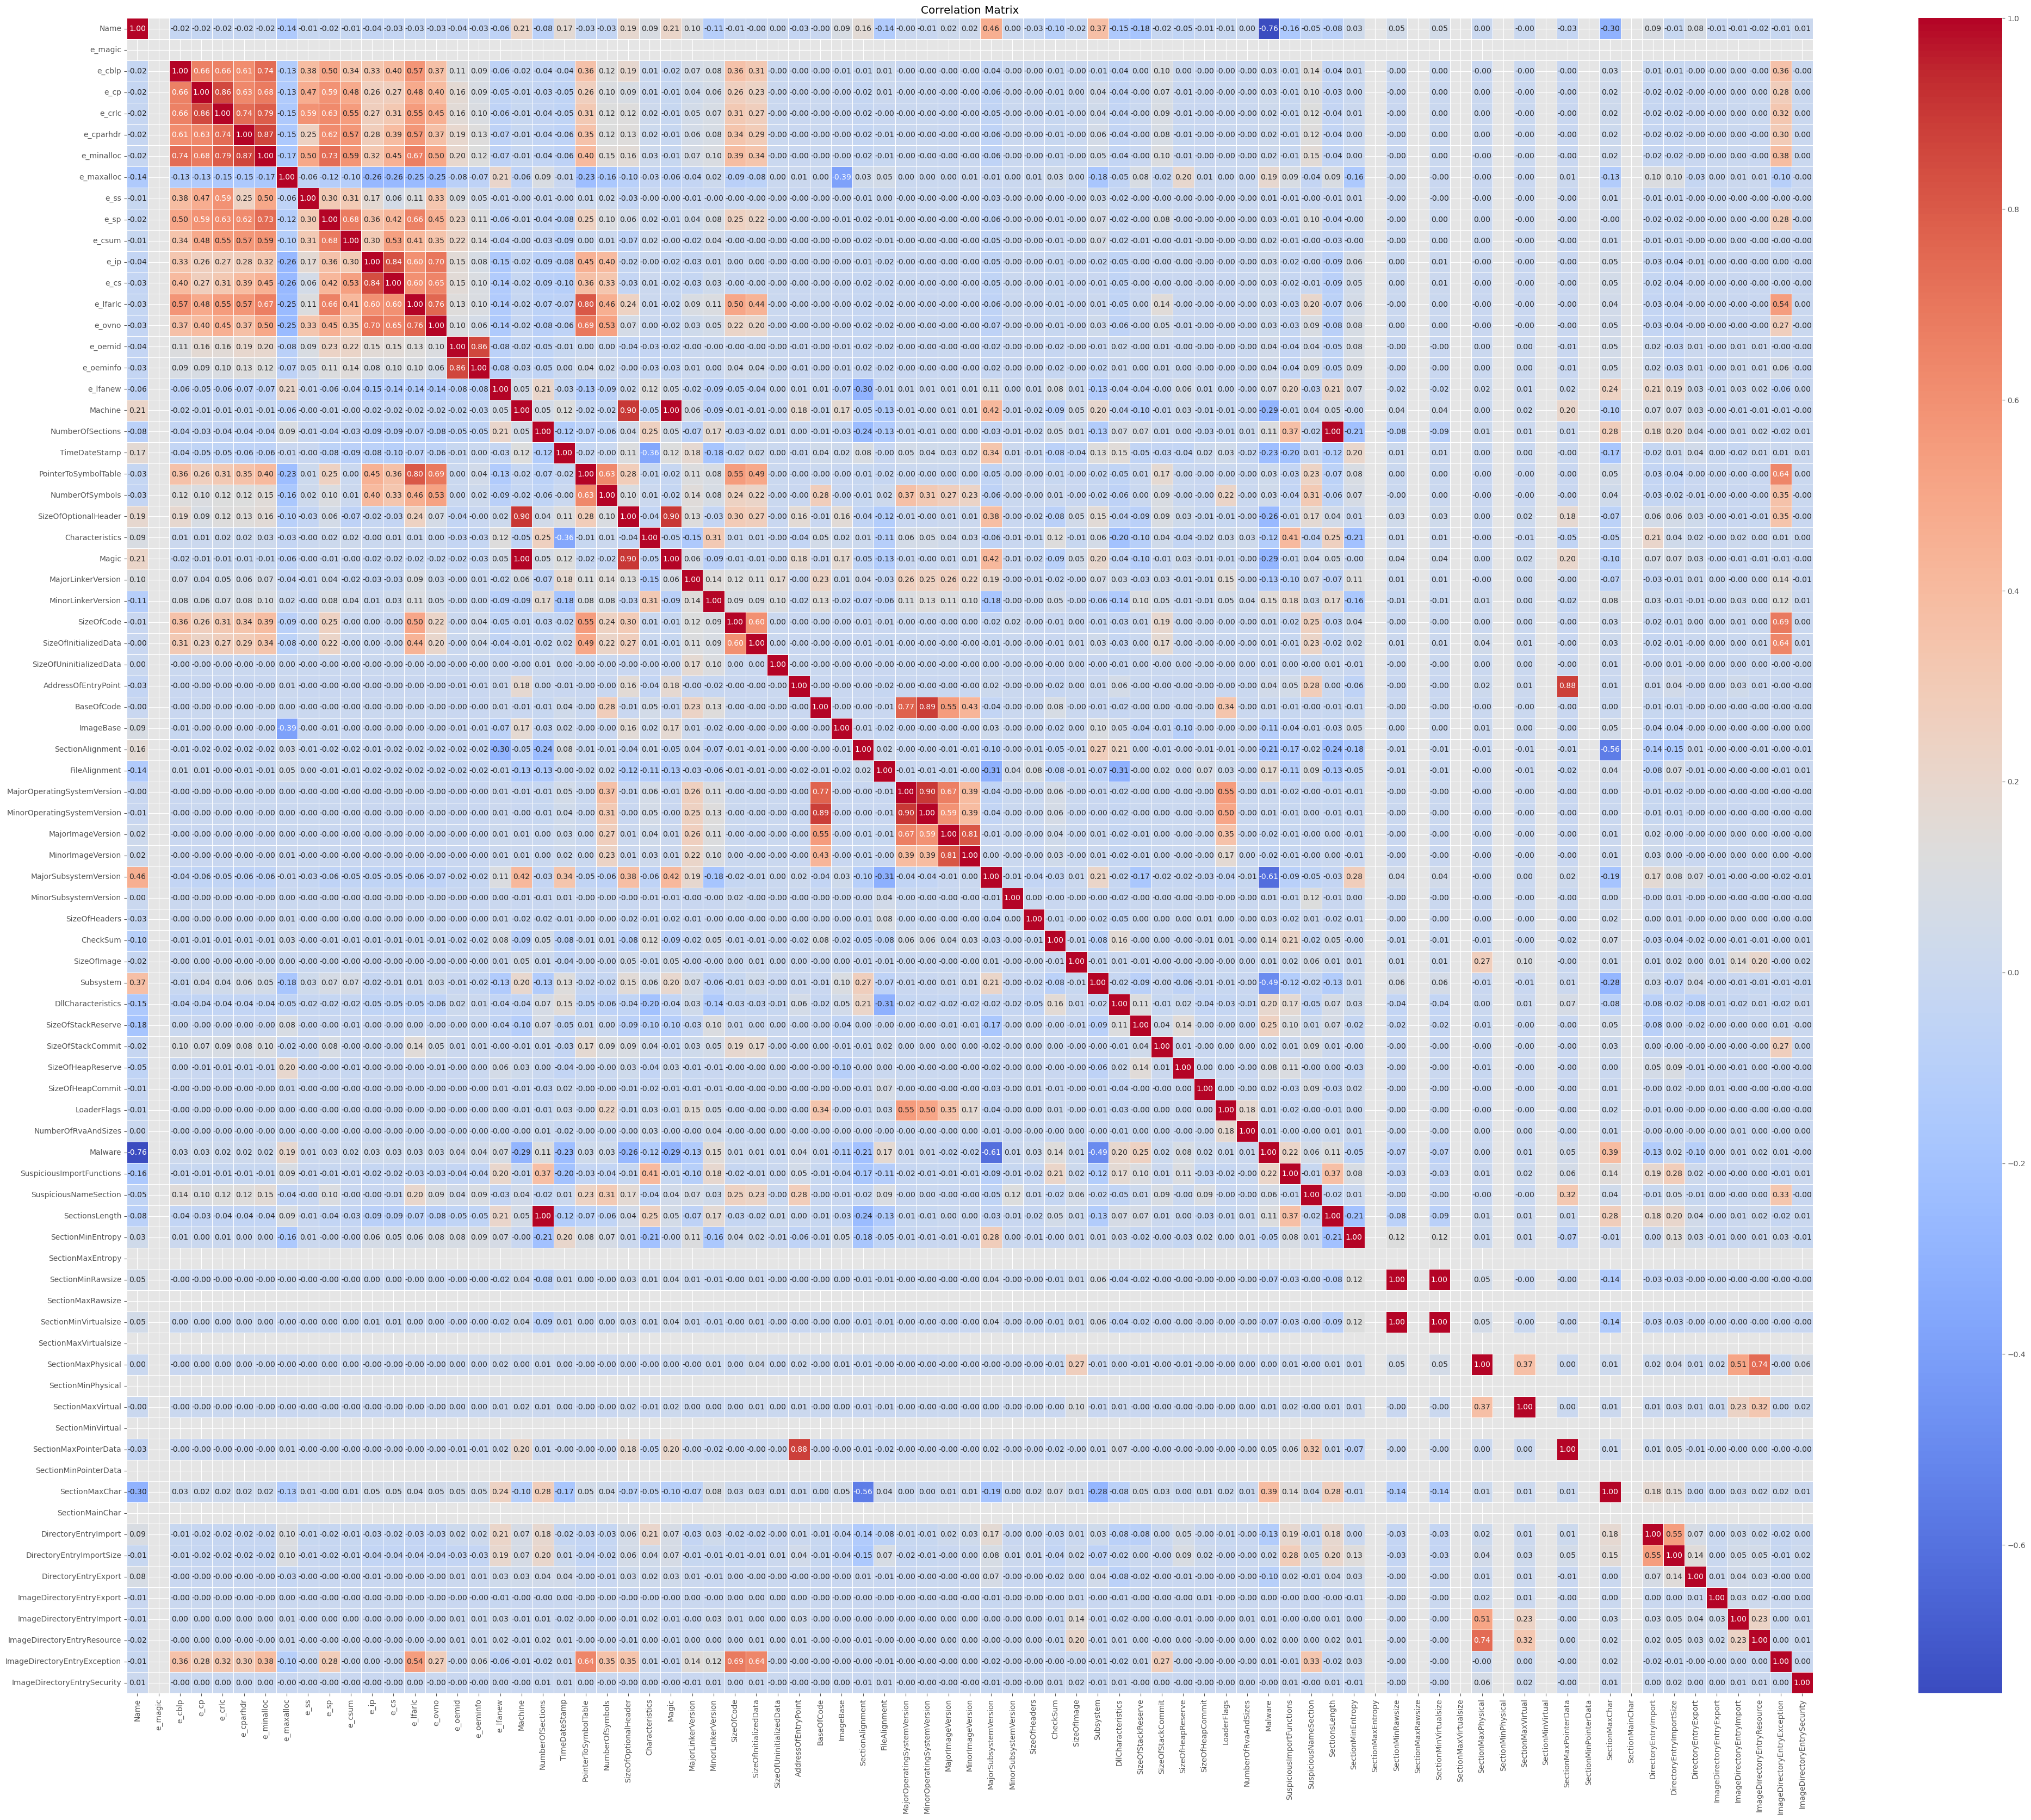

In [73]:
non_numeric_columns = ['Name']
for column in non_numeric_columns:
    data[column] = pd.factorize(data[column])[0]
correlation_matrix = data.corr()
plt.figure(figsize=(50, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

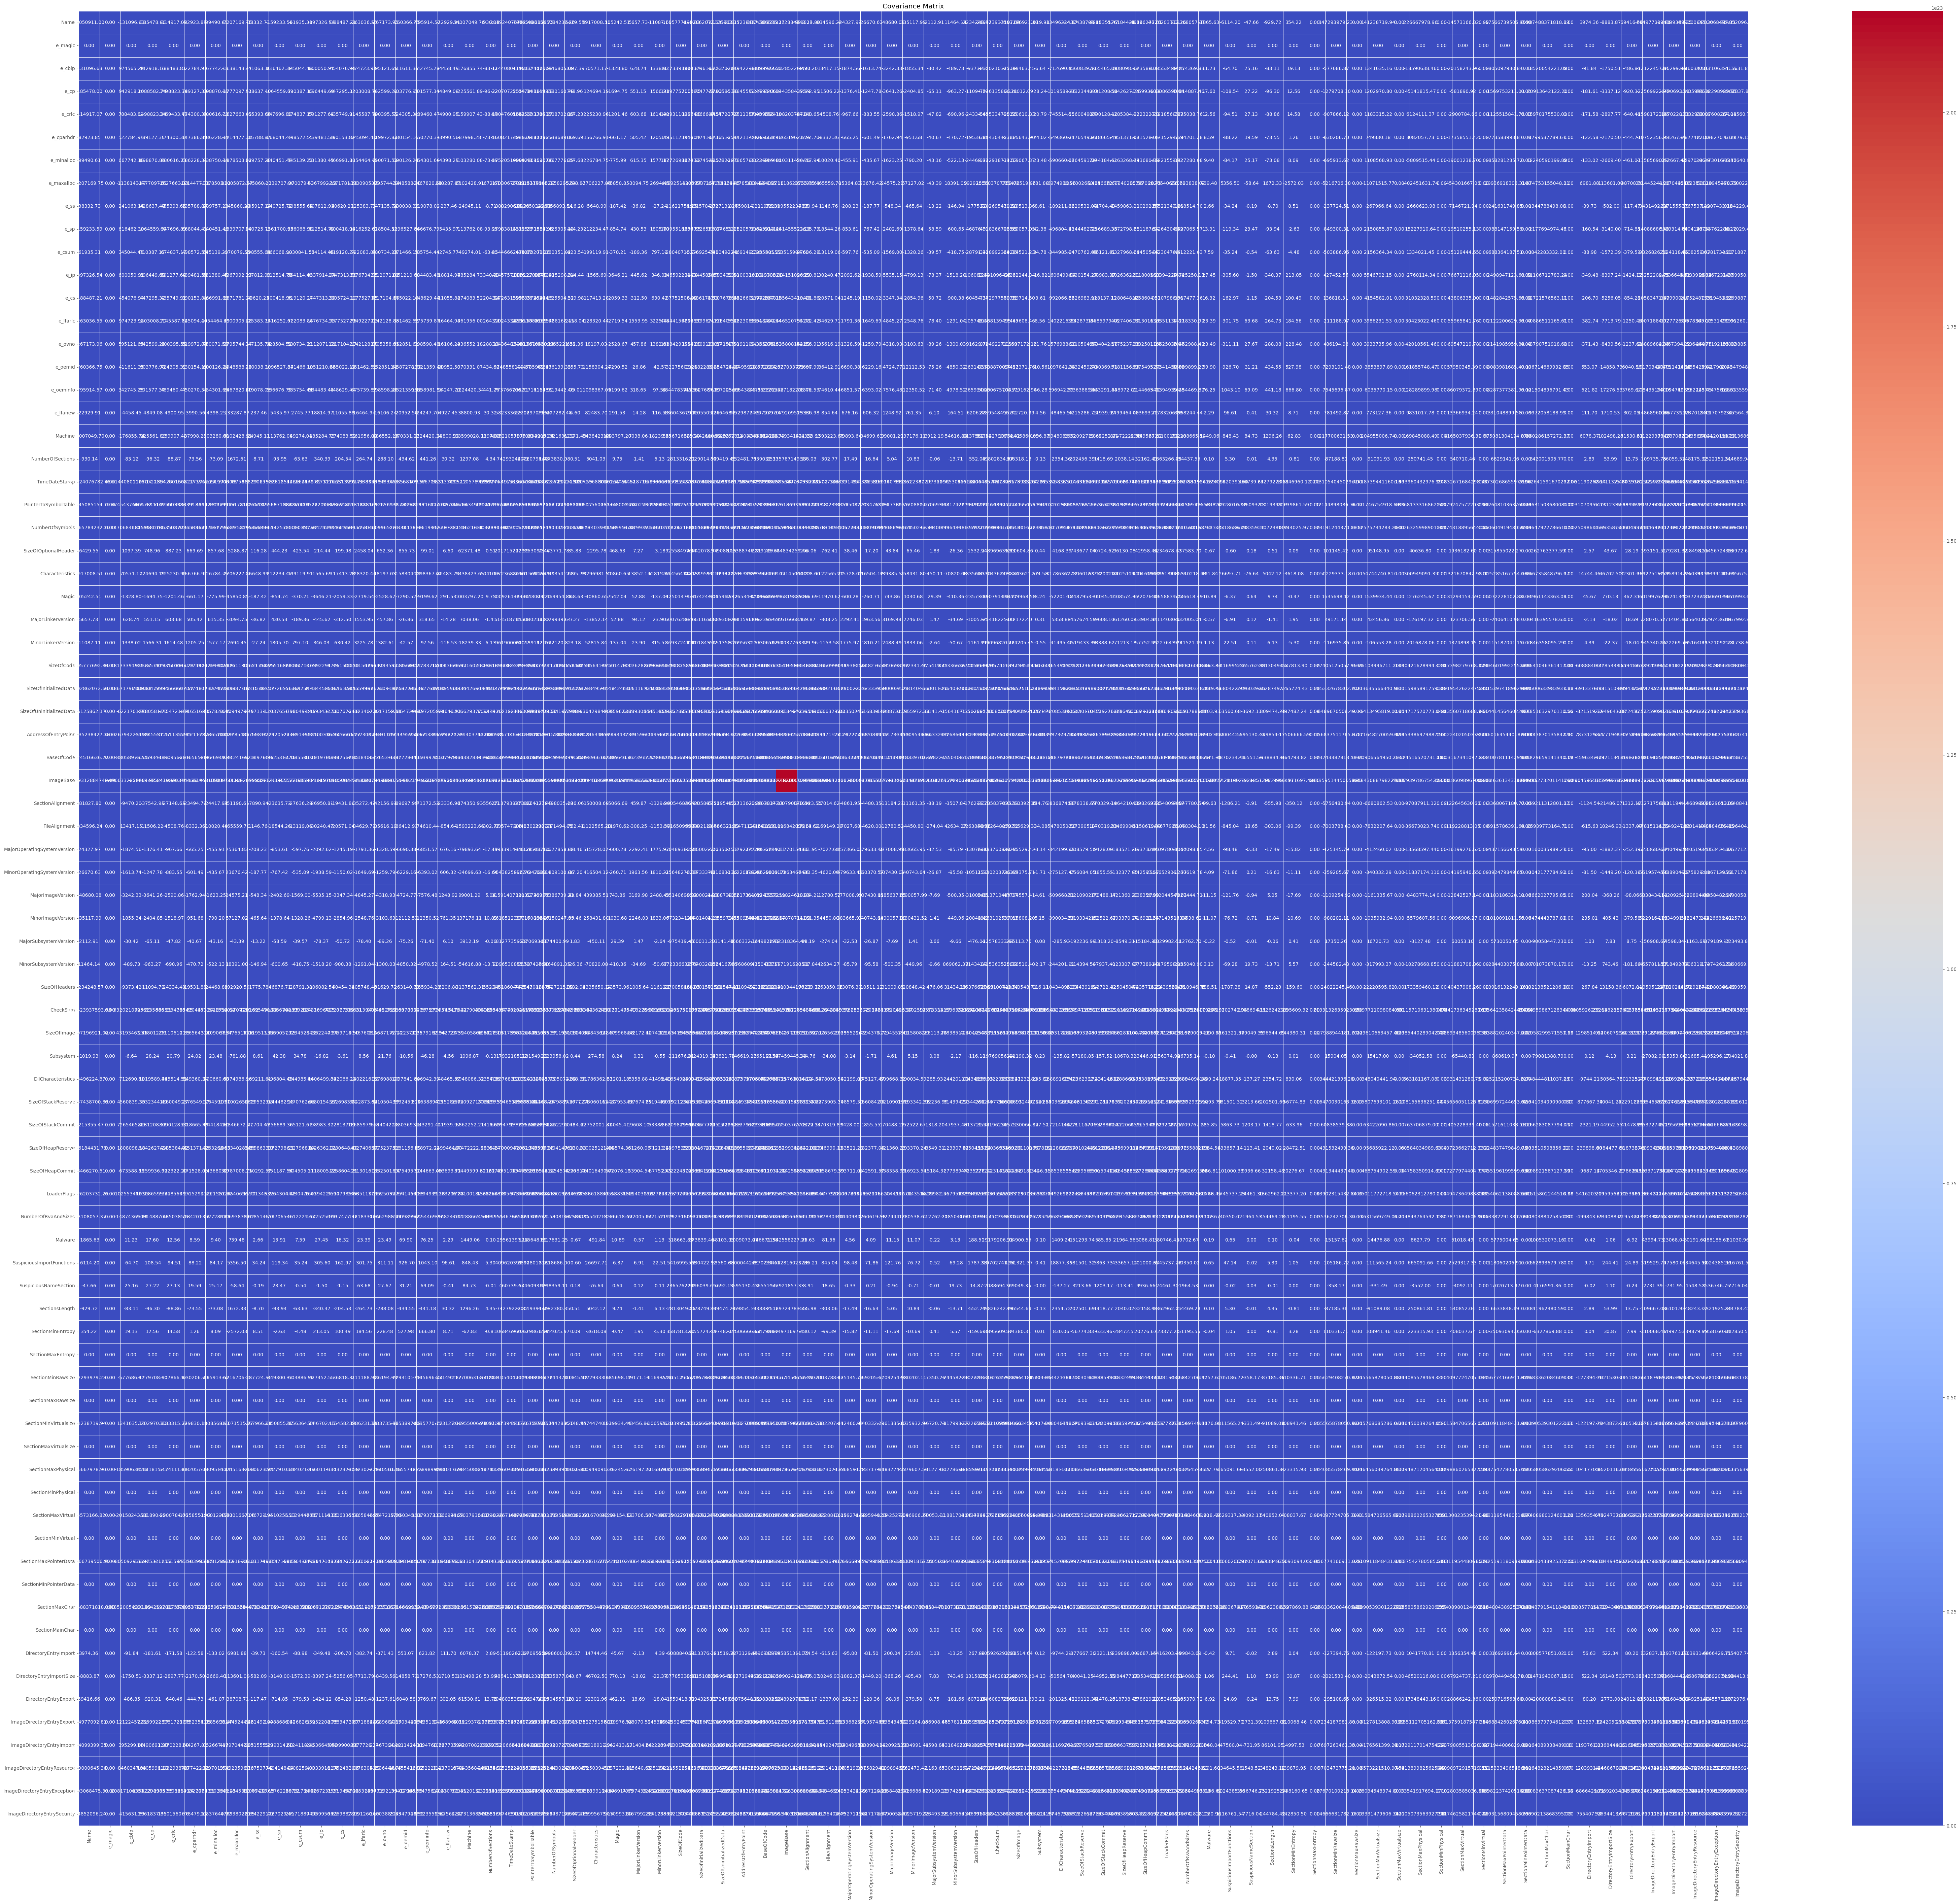

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['Malware']))
scaled_df = pd.DataFrame(scaled_features, columns=data.drop(columns=['Malware']).columns)
covariance_matrix = data.cov()
plt.figure(figsize=(80, 70))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Covariance Matrix')
plt.show()

In [29]:
used_data = data.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['Malware'], test_size=0.2, random_state=0)
print(f'Number of used features is {X_train.shape[1]}')

Number of used features is 75


In [31]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [32]:
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9859801172572011


In [54]:
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))
print("confusion matrix:", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97      1004
     Malware       0.99      1.00      0.99      2919

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923

confusion matrix: [[ 963   41]
 [  14 2905]]


In [36]:
svm_classifier = SVC(kernel='rbf', gamma='scale')
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)

In [37]:
print("\nSVM Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_pred))



SVM Classifier:
Accuracy: 0.7476421106296202


In [53]:
print("Classification Report:")
print(classification_report(y_test, svm_pred,target_names=['Benign', 'Malware']))
print("confusion matrix:", confusion_matrix(y_test, svm_pred))


Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.01      0.03      1004
     Malware       0.75      1.00      0.86      2919

    accuracy                           0.75      3923
   macro avg       0.87      0.51      0.44      3923
weighted avg       0.81      0.75      0.64      3923

confusion matrix: [[  14  990]
 [   0 2919]]


In [45]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [49]:
clf = clf.fit(X_train, y_train)
# Making predictions on the test set
yy_test_pred=clf.predict(X_test)
acc_test= accuracy_score(y_test, yy_test_pred)

In [51]:
print("Accuracy test:", acc_test)
print(classification_report(y_test, yy_test_pred))

Accuracy test: 0.9747642110629621
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1004
           1       0.98      0.99      0.98      2919

    accuracy                           0.97      3923
   macro avg       0.97      0.96      0.97      3923
weighted avg       0.97      0.97      0.97      3923



In [52]:
print("confusion matrix:", confusion_matrix(y_test, yy_test_pred))


confusion matrix: [[ 930   74]
 [  25 2894]]


In [56]:
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [57]:
yY_pred = nb.predict(X_test)

In [58]:
accuracytest = accuracy_score(y_test, yY_pred)
print("Accuracy:", accuracytest)

Accuracy: 0.32398674483813406


In [60]:
print(classification_report(y_test, yY_pred))
print("confusion matrix:", confusion_matrix(y_test, yY_pred))


              precision    recall  f1-score   support

           0       0.27      1.00      0.43      1004
           1       0.99      0.09      0.17      2919

    accuracy                           0.32      3923
   macro avg       0.63      0.54      0.30      3923
weighted avg       0.81      0.32      0.24      3923

confusion matrix: [[1001    3]
 [2649  270]]
